In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import evaluate, print_perf
from surprise import KNNBasic

# Load & Sample data

In [2]:
dt = pd.read_csv('/home/tungngo/Downloads/ratings_Grocery_and_Gourmet_Food.csv')

In [3]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297155 entries, 0 to 1297154
Data columns (total 4 columns):
A1ZQZ8RJS1XVTX    1297155 non-null object
0657745316        1297155 non-null object
5.0               1297155 non-null float64
1381449600        1297155 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 39.6+ MB


In [4]:
dt.columns = ['reviewerID','productID','rating','unixTime']

In [5]:
dt.head()

,reviewerID,productID,rating,unixTime
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


In [6]:
dt['unixTime'] = pd.to_datetime(dt['unixTime'],unit='s')
dt = dt.rename(columns={'unixTime':'date'})

In [7]:
#Only take recent reviews
dt = dt.loc[dt['date']>'2014-01-01']
#Last Date
dt['date'].max()

Timestamp('2014-07-23 00:00:00')

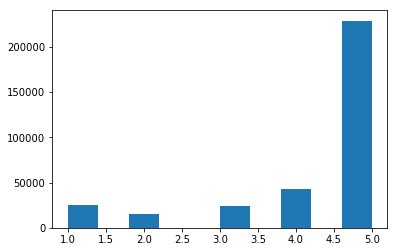

In [8]:
#Histogram of ratings
rating_hist = plt.hist(dt['rating'],align='mid')
#Group by product ID to count reviews per product
item_groupby = dt.groupby('productID',as_index=False)
review_count = item_groupby['reviewerID'].count()
review_count.columns = ['productID','count_review']

In [9]:
review_count.head()

,productID,count_review
0,1603112251,1
1,1613170416,3
2,1837994021,1
3,3295000018,13
4,3301261876,6


In [10]:
#Randomly select products from subset of products with at least a number of reviews
product_list = review_count[review_count['count_review']>=10]
random_product = product_list.take(np.random.permutation(len(product_list))[:100])
random_product_list = random_product['productID']

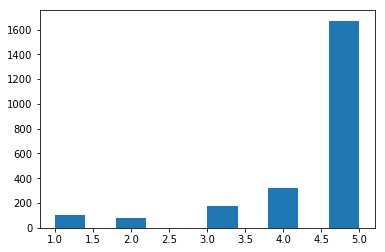

In [11]:
#Merge these products with original rating data
data = dt.loc[dt['productID'].isin(random_product_list)].reset_index(drop=True)
rating_hist = plt.hist(data['rating'],align='mid')
#Write to a CSV file
data.to_csv('/home/tungngo/code/personalization/sample_data')

In [12]:
data.describe()

,rating
count,2353.000000
mean,4.434764
std,1.063510
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


# Matrix Factorization

In [13]:
#Baseline model

In [14]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(data[['reviewerID','productID','rating']],reader)

In [15]:
algo = SVD()

In [16]:
perf = evaluate(algo, data, measures=['RMSE', 'MAE'],verbose=2)

Evaluating RMSE, MAE of algorithm SVD.

------------
Fold 1
user: A2ZDCNFKX2WPUK item: B007WW5E8M r_ui = 5.00   est = 4.53   {u'was_impossible': False}
user: A3CJQQYIGVX4TO item: B00CZ2KYRU r_ui = 5.00   est = 4.40   {u'was_impossible': False}
user: A26JFFHAR1RLJ9 item: B001EQ58EC r_ui = 5.00   est = 4.72   {u'was_impossible': False}
user: AIVP9XIL28J6H item: B0049YMAII r_ui = 5.00   est = 3.78   {u'was_impossible': False}
user: A1POGYPCJMCJK8 item: B000KEPBBY r_ui = 1.00   est = 4.33   {u'was_impossible': False}
user: AX3HQ4I6QEDUN item: B003Y5S0XW r_ui = 5.00   est = 4.66   {u'was_impossible': False}
user: A1C0QNVH7N7MZ4 item: B0055QVU6M r_ui = 4.00   est = 4.47   {u'was_impossible': False}
user: AZAP9G2YQWJFH item: B007WC38MG r_ui = 5.00   est = 4.35   {u'was_impossible': False}
user: A14638TGYH7GD9 item: B00DF0KXYK r_ui = 5.00   est = 3.95   {u'was_impossible': False}
user: A1HKHLRU9EI5QT item: B008OUN6JK r_ui = 4.00   est = 4.34   {u'was_impossible': False}
user: A7Y9MP7H8LYUE ite

user: A850W6KBIYISR item: B001CFMGGI r_ui = 5.00   est = 3.88   {u'was_impossible': False}
user: A2SYZHHYQF3JVW item: B003AYEHIO r_ui = 5.00   est = 4.65   {u'was_impossible': False}
user: AIJCT4462PKR8 item: B002WWBT4K r_ui = 5.00   est = 4.41   {u'was_impossible': False}
user: A1HUYGJEKO1IFA item: B0045RE69A r_ui = 5.00   est = 4.86   {u'was_impossible': False}
user: AK9WAJJG9CN2W item: B00EDX4YXY r_ui = 2.00   est = 4.26   {u'was_impossible': False}
user: A1AGUO5PPZQL6S item: B004766REQ r_ui = 5.00   est = 4.28   {u'was_impossible': False}
user: A1CFU5XJXN3PV4 item: B00DF0KXYK r_ui = 2.00   est = 3.83   {u'was_impossible': False}
user: A32BYHWKU8GU7L item: B003AYEHIO r_ui = 5.00   est = 4.65   {u'was_impossible': False}
user: A2XB9SP11Q5B27 item: B00269XE0Q r_ui = 5.00   est = 4.36   {u'was_impossible': False}
user: A2V2GNF8N4JTDQ item: B001CFMGGI r_ui = 5.00   est = 3.88   {u'was_impossible': False}
user: A2PBXA17MGI716 item: B00068PCTK r_ui = 5.00   est = 4.17   {u'was_impossible'

user: AJQOTTJM23DIQ item: B004CGC86C r_ui = 4.00   est = 4.37   {u'was_impossible': False}
user: A24U55NJ6ZMQI1 item: B000MN6Y46 r_ui = 5.00   est = 4.70   {u'was_impossible': False}
user: A21L0L9CVLMZWY item: B0039N0DN4 r_ui = 5.00   est = 4.41   {u'was_impossible': False}
user: A3LC5SMEIEIS0K item: B007WC38MG r_ui = 5.00   est = 4.37   {u'was_impossible': False}
user: A1HD8EWSHR9FM6 item: B0059JXK2M r_ui = 5.00   est = 4.47   {u'was_impossible': False}
user: A2WP8A3JEFTWCG item: B005DDC4XK r_ui = 5.00   est = 4.55   {u'was_impossible': False}
user: A2FMSP6A4JO0AZ item: B000G6MBTG r_ui = 3.00   est = 4.54   {u'was_impossible': False}
user: A3DKCBKDEO2GS3 item: B0000531B7 r_ui = 5.00   est = 4.47   {u'was_impossible': False}
user: A235EY6S2D1SG0 item: B005DL7KEA r_ui = 1.00   est = 4.26   {u'was_impossible': False}
user: A3TJHEDY8599CB item: B00K0QVV52 r_ui = 5.00   est = 4.49   {u'was_impossible': False}
user: A2DKMD285D7J8I item: B007WC38MG r_ui = 5.00   est = 4.37   {u'was_impossibl

In [17]:
print_perf(perf)

        Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    
MAE     0.7547  0.7346  0.7483  0.7638  0.7415  0.7486  
RMSE    1.0574  1.0321  1.0313  1.0566  1.0089  1.0373  
